# 내일배움 캠프 20일차 TIL
---
## 팀 추가 도전 과제 : 워드클라우드

In [6]:
# 1 데이터셋 불러오기
import pandas as pd
df = pd.read_csv("/Users/t2023-m0072/Desktop/TIL/assignment/netflix_reviews.csv")  # 파일 불러오기

In [10]:
import re
def preprocess_text(text):
    
    if isinstance(text,float): # Pandas 에서 결측값(NaN)은 float 로 처리되므로 NaN 값 처리
        return ""
    '''
    df['content'] = df['content'].fillna(
    df['score'].replace({ # replace() 메서드로 점수에 해당하는 문자열로 매핑 --> 하려했으나 로딩?너무 오래걸려서 그냥 결측값 없애는걸로
        5: 'Excellent!',
        4: 'Good!',
        3: 'Average.',
        2: 'Could be better.',
        1: 'Terrible!'
    })
    )
    '''
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text) # text 중 문자+띄어쓰기를 제외한 모든것을 없앰
    text = re.sub(r'\d+','',text) # text 중 숫자가 하나 이상인 것 제거
    text = text.strip() # .strip() : 문자열 앞,뒤 공백 제거
    return text

# lambda 함수를 사용하여 content 열 전처리
df['content'] = df['content'].apply(lambda x: preprocess_text(x))

In [14]:
# 5 NLP 이용해 감성 분석
import nltk
from textblob import TextBlob
import pandas as pd

In [15]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [16]:
# 감성 분석을 df['content']에 적용하여 sentiment 열 생성
df['sentiment'] = df['content'].apply(get_sentiment)

# sentiment 열의 데이터 타입 확인 및 문자열 처리
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# sentiment 값을 바탕으로 긍정, 부정, 중립 분류
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))

# 결과 출력
result = df[['content', 'score', 'sentiment_label']]
result

,content,score,sentiment_label
0,this app not supporting my device rog mobile k...,1,positive
1,im getting very tired you guys keep logging me...,2,negative
2,one of my go to channelsl was at least movies...,5,neutral
3,poor scripts violent content,2,negative
4,good,3,positive
...,...,...,...
117287,i really like it there are so many movies and ...,5,positive
117288,i love netflix i always enjoy my time using it,5,positive
117289,sound quality is very slow of movies,1,neutral
117290,rate is very expensive bcos we see netflix sun...,1,negative


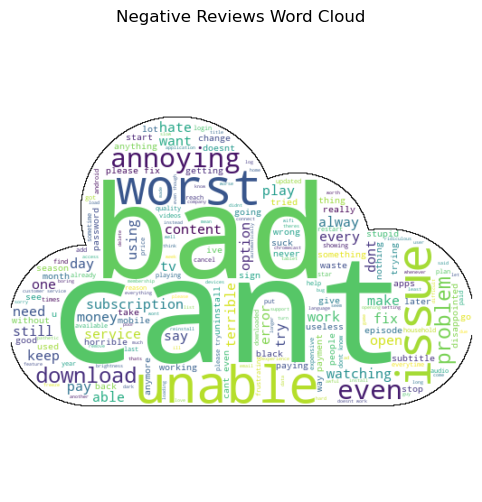

In [17]:
# 필요 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # 이미지 파일 다루기 위한 Pillow 라이브러리의 Image 모듈 가져오기
from wordcloud import WordCloud, STOPWORDS # STOPWORDS : 사용하지 않을 단어들(불용어),  type(STOPWORDS) - set

# 부정적인 리뷰 필터링
negative_reviews = ' '.join(df[df['sentiment_label'] =="negative"]['content'])

# 마스크 이미지를 사용하는 법 
mask = np.array(Image.open('/Users/t2023-m0072/Desktop/TIL/assignment/cloud.png'))


# 불용어 설정
stopwords = set(STOPWORDS)
stopwords.update(['watch','account','netflix','use','im','new','will','shows','video','screen','update','now','device', 'movie', 'show', 'time', 'app', 'series', 'phone','movies'])
# update() 메서드 : 주로 set 과 dict 형태에 사용됨. 주어진 리스트,튜플,집합 등의 요소를 현재 집합에 추가. 중복 요소 무시



# WordCloud 생성 
wordcloud = WordCloud(
    mask=mask, # 마스크 이미지
    contour_color='black', # 윤곽선 색상
    contour_width=1, # 윤곽선 두께
    width=800,  # 가로 크기
    height=400, # 세로 크기
    background_color='white',  # 배경 색상
    stopwords=stopwords   # 불용어
).generate(negative_reviews) # generate() : 주어진 텍스트 데이터를 기반으로 워드 클라우드를 만듬

# WordCloud 출력
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # 축 숨기기
plt.title('Negative Reviews Word Cloud')
plt.show()

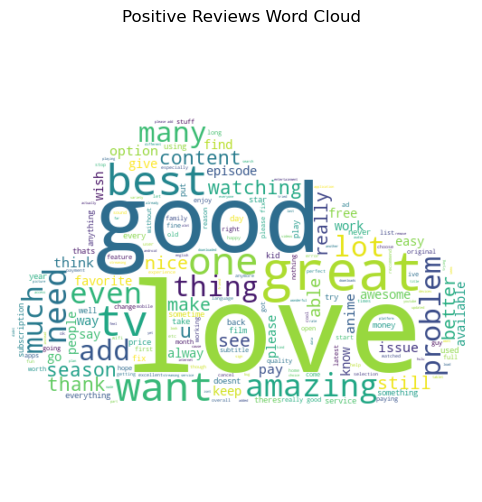

In [19]:
# 긍정적 리뷰 필터링
positive_reviews = ' '.join(df[df['sentiment_label'] =="positive"]['content'])

# 마스크 이미지를 사용하는 법 
mask = np.array(Image.open('/Users/t2023-m0072/Desktop/TIL/assignment/cloud.png'))

# 불용어 설정
stopwords = set(STOPWORDS)
stopwords.update(['watch','cant','download','account','netflix','use','im','new','will','shows','video','screen','update','now','device', 'movie', 'show', 'time', 'app', 'series', 'phone','movies','dont'])
# update() 메서드 : 주로 set 과 dict 형태에 사용됨. 주어진 리스트,튜플,집합 등의 요소를 현재 집합에 추가. 중복 요소 무시

# WordCloud 생성
wordcloud = WordCloud(mask=mask,width=800, height=400, background_color='white', stopwords=stopwords).generate(positive_reviews)

# WordCloud 출력
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

## 알게 된 것
* 워드 클라우드를 마스크를 이용해 이미지의 형태로 출력할 수도 있다